In [3]:
# Install TensorFlow
!pip install tensorflow

# Imports
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Load CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values (0–255 → 0–1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


(50000, 32, 32, 3)


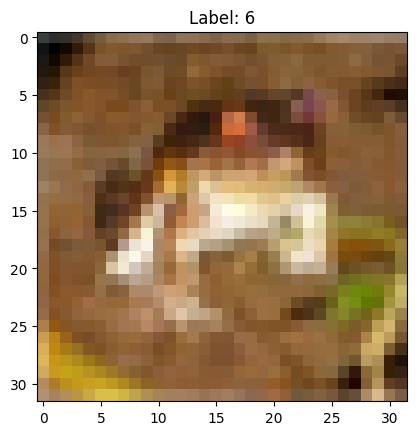

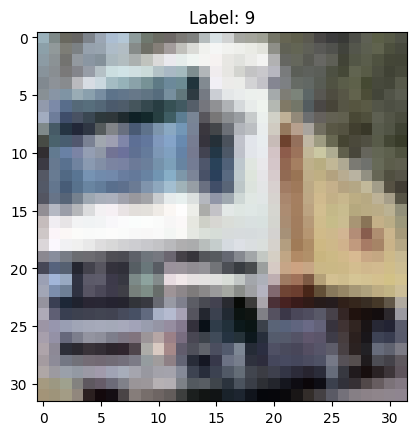

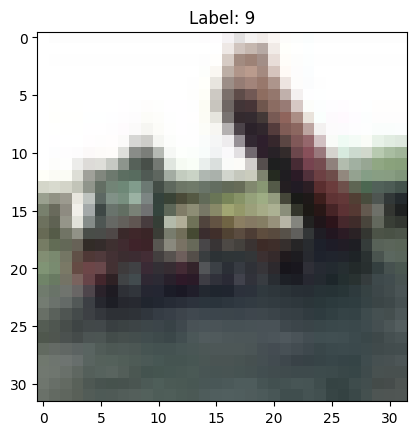

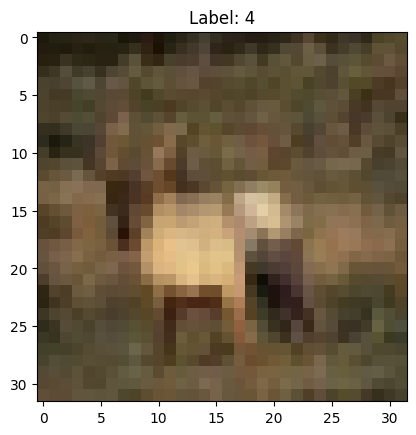

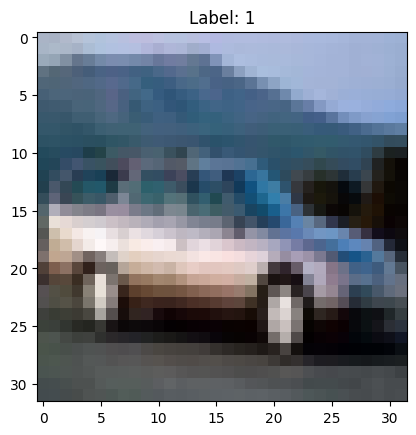

In [5]:
# Check shape
print(x_train.shape)  # (50000, 32, 32, 3)

# Display some images
for i in range(5):
    plt.imshow(x_train[i])
    plt.title(f"Label: {y_train[i][0]}")
    plt.show()

In [6]:
from tensorflow.keras import Input

model = Sequential([
    Input(shape=(32, 32, 3)),  # Input layer for 32x32 RGB images

    #First conv block
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    #Second conv block
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    # Dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')  # 10 output classes
])

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Train the CNN
history = model.fit(
    x_train, y_train_cat,
    epochs=10,
    validation_data=(x_test, y_test_cat),
    batch_size=64
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 77ms/step - accuracy: 0.3460 - loss: 1.7850 - val_accuracy: 0.5169 - val_loss: 1.3502
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 73ms/step - accuracy: 0.5477 - loss: 1.2717 - val_accuracy: 0.6245 - val_loss: 1.0780
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 75ms/step - accuracy: 0.6068 - loss: 1.1094 - val_accuracy: 0.6545 - val_loss: 1.0048
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 74ms/step - accuracy: 0.6463 - loss: 1.0028 - val_accuracy: 0.6687 - val_loss: 0.9476
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 71ms/step - accuracy: 0.6731 - loss: 0.9312 - val_accuracy: 0.6794 - val_loss: 0.9327
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 73ms/step - accuracy: 0.6960 - loss: 0.8680 - val_accuracy: 0.6933 - val_loss: 0.8891
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 71ms/step - accuracy: 0.7150 - loss: 0.8150 - val_accuracy: 0.7094 - val_loss: 0.8563
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 74ms/step - accuracy: 0.7285 - loss: 0.7774 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


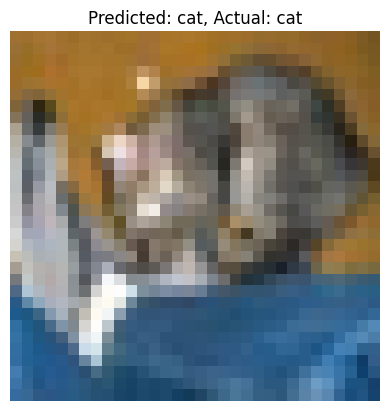

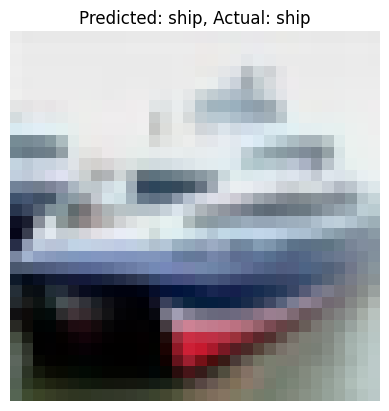

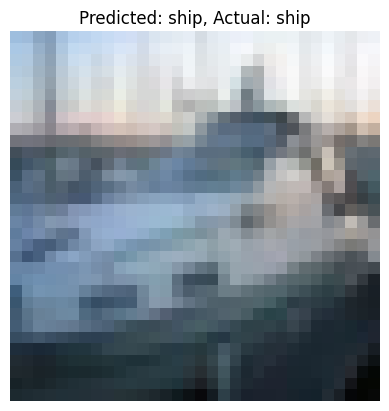

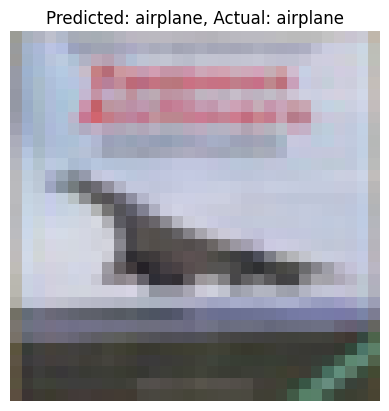

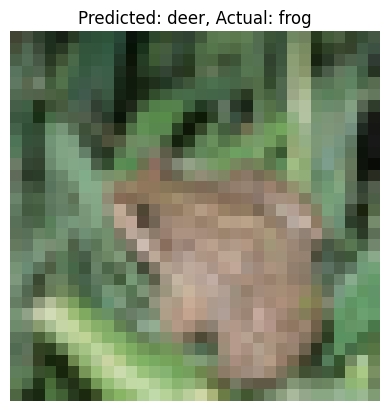

In [9]:
import numpy as np
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Show 5 predictions
for i in range(5):
    plt.imshow(x_test[i])
    plt.title(f"Predicted: {class_names[predicted_labels[i]]}, Actual: {class_names[y_test[i][0]]}")
    plt.axis('off')
    plt.show()